In [1]:
from IPython.display import Math, HTML
!pip3 install scikit-learn==0.21rc2

!pip3 install imbalanced-learn

import imblearn

  Using cached https://files.pythonhosted.org/packages/b4/ca/dabfef597ae86fe4b903b01c2173e4ad8a61301d6e28a9db3fcc3f0b1433/scikit_learn-0.21rc2-cp35-cp35m-manylinux1_x86_64.whl
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
  Using cached https://files.pythonhosted.org/packages/1f/af/e3c3cd6f61093830059138624dbd26d938d6da1caeec5aeabe772b916069/scikit_learn-0.21.3-cp35-cp35m-manylinux1_x86_64.whl
  Found existing installation: scikit-learn 0.21rc2
    Uninstalling scikit-learn-0.21rc2:
      Successfully uninstalled scikit-learn-0.21rc2


# Good Practises in Machine Learning: Data Modeling with Python

This session will cover the basics of data modeling in Scikit-Learn, a popular package containing a collection of tools for machine learning written in Python. See more at http://scikit-learn.org.

## Outline

**Main Goal:** To introduce the central concepts of machine learning, and how they can be applied in Python using the scikit-learn Package.

1. Exploratory Data Analysis
2. Modeling
    - Logistic Regression
    - Decision and Regression Trees
    - Neural Networks: Multi - Layer Perceptron
3. Hyperparameter Grid - Search

## About Scikit-Learn

[Scikit-Learn](http://github.com/scikit-learn/scikit-learn) is a Python package designed to give access to **well-known** machine learning algorithms within Python code, through a **clean, well-thought-out API (programming guide)**. It has been built by hundreds of contributors from around the world, and is used across industry and academia.

Scikit-Learn is built upon Python's [NumPy (Numerical Python)](http://numpy.org) and [SciPy (Scientific Python)](http://scipy.org) libraries, which enable efficient in-core numerical and scientific computation within Python. As such, scikit-learn is not specifically designed for extremely large datasets, though there is [some work](https://github.com/ogrisel/parallel_ml_tutorial) in this area.

For this short introduction, we are going to stick to questions of in-core processing of small to medium datasets with Scikit-learn.

## What has Data Modeling to do with Machine Learning?



In this section we will shortly discuss the basic principles of machine learning.
Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

We'll take a look at a classic machine learning tasks here.
The consist of a **classification** task: the figure shows a
collection of two-dimensional data, colored according to two different class
labels. A classification algorithm may be used to draw a dividing boundary
between the two clusters of points:

In [2]:
# Here we import matplotlib for plotting and set the standard theme to 'seaborn'
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

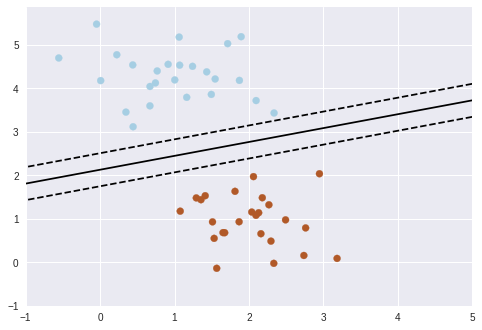

In [3]:
# Import the example plot from the figures directory
from fig_code import plot_sgd_separator
plot_sgd_separator()

This may seem like a trivial task, but it is a simple version of a very important concept.
By drawing this separating line, we have learned a model which can **generalize** to new
data: if you were to drop another point onto the plane which is unlabeled, this algorithm
could now **predict** whether it's a blue or a red point. 

The next simple task we'll look at is a **regression** task: a simple best-fit line
to a set of data:

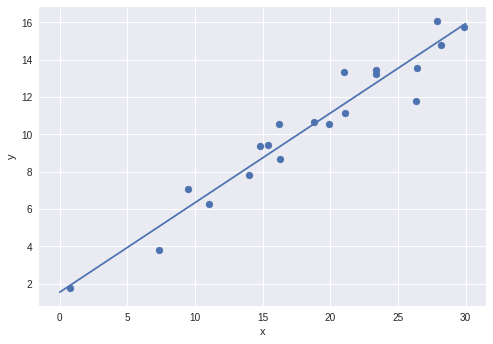

In [4]:
from fig_code import plot_linear_regression
plot_linear_regression()

Again, this is an example of fitting a model to data, such that the model can make
generalizations about new data.  The model has been **learned** from the training
data, and can be used to predict the result of test data:
here, we might be given an x-value, and the model would
allow us to predict the y value.  Again, this might seem like a trivial problem,
but it is a basic example of a type of operation that is fundamental to
machine learning tasks.

## Representation of Data in Scikit-learn

Machine learning is about creating models from data: for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on our matplotlib examples from the previous session and show some
examples of how to visualize data.

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases. Also features could be text, in that case we can transform them to represent a    quantitative value, this is shown further in this tutorial.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

![Data Layout](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.02-samples-features.png)

(Figure from the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook))

In [5]:
# Let's start by importing some modules we need 
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Description of the Data

The data we are going to use is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable 'y').

This dataset provides the customer information. It includes 4119 records and 21 fields. Let's have a first look at our dataset.

In [42]:
data = pd.read_csv('bank.csv', header=0,sep=';')
data = data.dropna()
print(data.shape)
print(list(data.columns))
data.head()

(4119, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


As we can see we have different traits of the individuals, with textual and quantitative features. For a full description and further background on the dataset, check out [this page](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

In [43]:
# Let's have a look at the different inputs of education
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

Now we see that education has three variants of basic, however, we can merge them into one 'Basic' Variable:

In [44]:
# Replace
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])
# Check your results
data['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

In [45]:
# Let's have look at the mean of variables grouped by our target variable 'y'
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
yes,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


**Observations:**

The average age of customers who bought the term deposit is higher than that of the customers who didn't. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale. Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [46]:
display(data.groupby('marital').mean())
display(data.groupby('education').mean())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,45.107623,263.163677,2.542601,972.255605,0.174888,0.143274,93.600547,-40.621973,3.707177,5170.145964
married,42.389398,256.289757,2.527700,964.162216,0.173774,0.172260,93.599039,-40.357114,3.728554,5170.724472
single,33.209020,254.647875,2.555941,947.338248,0.233304,-0.128448,93.529971,-40.768257,3.352657,5155.756114
unknown,42.272727,336.272727,2.545455,999.000000,0.090909,0.181818,93.537545,-39.690909,3.855182,5174.409091


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144
high.school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000
professional.course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140
university.degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479


**Observations:**

What we observe from the above table is for example that the average age of single individuals is lower than married and divorced individuals. Also we see that apparently a lot of single individuals were called in a period where there was a decrease in employment rate, as the social - economic indicator emp.var.rate at that time is negative. Also, looking at the social - economic indicators, we note that the dataset is from the period 2008-2013, in which Portugal was in a recession, following the European banking crisis, this explains the negative consumer confidence index. 
From the second table, we cannot see too many interesting outliers in the mean data, however we note that there was one illiterate individual, which has $pdays = 999.00$ which means there has not been a contact moment before. 



>**Question**: [pd.group_by](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) is a powerful tool, and as more bound methods like max(), median(), min(), std(), skew(), corr(). Can you identify more interesting facts about the data? Try to find 3 interesting relations by using these methods. You can do so by running in the cell below.

In [47]:
display(data.groupby('marital')."<fill in>")
display(data.groupby('education')."<fill in>")

SyntaxError: invalid syntax (<ipython-input-47-22eff5a1fb21>, line 1)

Okay, let's further on have a look at the job categories:

Text(0, 0.5, 'Frequency of Purchase')

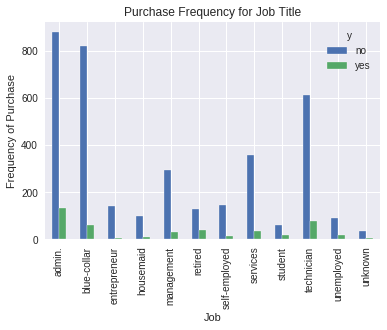

In [48]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

#### Create dummy variables
Now let's have a look again at our data table above. We note that there are some categorical variables, which do not have a numeric value, so it will not be possible to include them in let's say a simple regression, since we cannot apply mathematical operations on them. What we can do though, is transforming the categories to binary variables so that for example an individual who has had a "University Degree" will have a $1$ in a column "education_university.degree" and $0$'s elsewhere in the education type columns. A very handy function **pd.get_dummies** of pandas makes this easy for us like shown below:

In [49]:
# Identify categorical columns
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    # Join the new columns to our original data - table
    data1=data.join(cat_list)
    data=data1
    
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
# We drop our 'pure' categorical variables and only keep the dummies
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
# Now let's take a look at our variable names
display(data_final.columns.values)

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


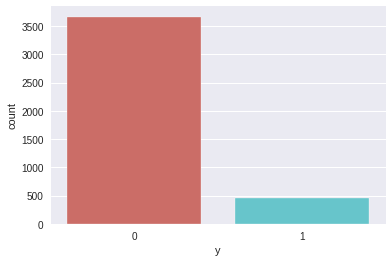

In [50]:
# Map y column to ones and zeros
data_final['y'] = data_final['y'].map(dict(yes=1, no=0))
data_final.head()

# Let's have look at the distribution of y column
sns.countplot(x='y',data=data_final, palette='hls')
plt.show()

As we can see, our target variable 'y' is not really balanced, as there many more negative $0$ cases then positive $1$ cases. This can bias our models towards the negative case. As we do not want this to happen, we can synthetically augment the positive cases (**in the training set!**) using so-called [SMOTE](https://arxiv.org/pdf/1106.1813.pdf) (Synthetic Minority Over-sampling Technique) based on the k-Nearest Neighbor algorithm. This will improve the precision and the recall of our classifier. There are more resampling algorithms, which you can look at in the `imbalanced-learn` module [user-guide](https://imbalanced-learn.readthedocs.io/en/stable/user_guide.html). Let's see how this is done using python:

In [51]:
# First let's create our training and test set
X = data_final.drop(['y'], axis=1)
y = data_final['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Then import SMOTE module
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
columns = X_train.columns

# Generate samples on training data
os_data_X, os_data_y=os.fit_sample(X_train, y_train)

# Add augmented samples to training data
X_train = pd.DataFrame(data=os_data_X,columns=columns)
y_train = pd.DataFrame(data=os_data_y,columns=['y'])

# Check the numbers of our data
print("Length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y==0]))
print("Number of subscription",len(os_data_y[os_data_y==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y==1])/len(os_data_X))

length of oversampled data is  5108
Number of no subscription in oversampled data 2554
Number of subscription 2554
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


<h4><center>Okay, now we are ready to start training!</center></h4>

## Logistic Regression Model 

All linear models make use of a "signal" $s$ (the target, or $y$ column in our table) which is a linear combination of the input vector ${\bf x}$ components weighed by the corresponding components in a weight vector ${\bf w}$.

$$
{\bf w} = \begin{bmatrix} w_0 & w_1 & ... & w_d \end{bmatrix}^T \\
s = w_0 + w_1 x_1 + \;...\; + w_d x_d = \sum_{i=0}^d w_i x_i = {\bf w} \cdot {\bf x} = {\bf w}^T {\bf x}
$$

Note that the homogeneous representation (with the $w_0$ at the first component) allows us to include a constant offset using a more compact vector-only notation (${\bf w}^T {\bf x}$ instead of ${\bf w}^T {\bf x}+b$). In our case, because we have structured tabular data, **W** will be a weight matrix and **X** will be our table such that we can compute our signal vector **s** such that: **s** = ${\bf W}^T {\bf X}$

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single call are modeled using a **logistic function**.

Logistic regression passes the signal **s**, through the logistic function which is also known as **sigmoid** and then treats the result as a probability, as the outcome is a number in the $[0,1]$ interval:

$$
  \hat{y}_{\text{probability}}  = sigmoid(\bf s)
$$

$$
sigmoid(s) = \frac{e^\bf{s}}{1+e^\bf{s}} = \frac{1}{1+e^{-\bf{s}}}
$$

![alt text](https://www.heatonresearch.com/images/blog/2013-04-01-chart-function-r-1.png)


[Check out the scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


### Let's have look how to implement this in scikit-learn:

In [83]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


### Confusion Matrix


In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[955 159]
 [ 28  94]]


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1114
           1       0.37      0.77      0.50       122

    accuracy                           0.85      1236
   macro avg       0.67      0.81      0.71      1236
weighted avg       0.91      0.85      0.87      1236



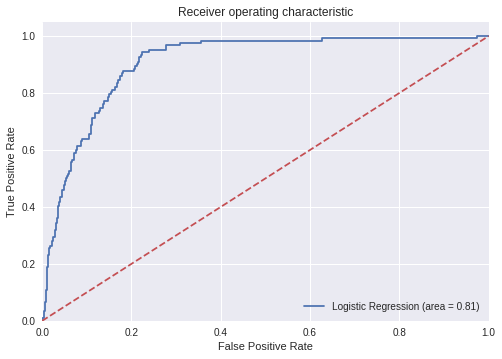

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# Here we save the figure
plt.savefig('Log_ROC_Logistic_Regression')
plt.show()

## Decision Trees and Random Forests 

Previously we saw a powerful discriminative classifier, **Logistic Regression**.
Here we'll take a look at motivating another powerful algorithm. This one is a *non-parametric* algorithm called **Random Forests** which are made of **Decision Trees**. *Non-parametric* does not mean we do not have any parameters to optimize, instead, it means we can optimize a theoretically infinite parameter space! For a basic definition, *parametric* models have a closed set of parameters with distributional assumptions, while *non - parametric* models have a infinite space of possible parameters which is not constrained by distributional assumptions. For a formal definition, see [technical definition](http://mlss.tuebingen.mpg.de/2015/slides/ghahramani/gp-neural-nets15.pdf).

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn')

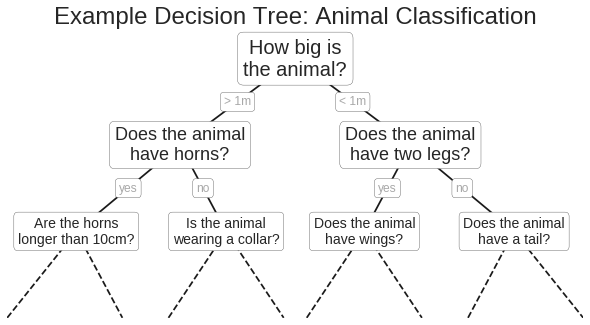

In [59]:
import fig_code
fig_code.plot_example_decision_tree()

### How to optimize the splits of a Decision Tree?

In order to split the nodes at the most informative features, we need to define an objective function that we want to optimize via the tree learning algorithm. Here, our objective function is to maximize the information gain at each split, which we define as follows:

$$ IG(D_p, f) = I(D_p) - \left(\frac{N_{left}}{N_p}I(D_{left})+\frac{N_{right}}{N_p}I(D_{right})\right) $$

Here, $f$ is the feature to perform the split, $D_p, D_{left}, \text{and}  \ D_{right}$ are the datasets of the parent and child nodes, $I$ is the impurity measure, $N_p$ is the total number of samples at the parent node, and $N_{left}$ and $N_{right}$ are the number of samples in the child nodes.
We will discuss impurity measures for classification and regression decision trees in more detail in our examples below. But for now, just understand that information gain is simply the difference between the impurity of the parent node and the sum of the child node impurities — the lower the impurity of the child nodes, the larger the information gain. Note that the above equation is for binary decision trees — each parent node is split into two child nodes only. If you have a decision tree with multiple nodes, you would simply sum the impurity of all nodes.


For the Decision Tree classifier, the default impurity measure is the _Gini Impurity_ which is formulated as:

$$ G = \sum^{C}_{i=1} p(i) \cdot (1-p(i))$$

So if we have C total classes and $p(i)$ is the probability of picking a datapoint with class $i$, then the Gini Impurity is calculated as above. When training a decision tree, the best split is chosen by **maximizing the Gini Gain**, which is calculated by subtracting the weighted impurities of the branches from the original impurity.

[Check out the scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

### Decision Trees and over-fitting

One issue with decision trees is that it is very easy to create trees which **over-fit** the data. That is, they are flexible enough that they can learn the structure of the noise in the data rather than the signal! For example, take a look at two trees built on two subsets of this dataset:

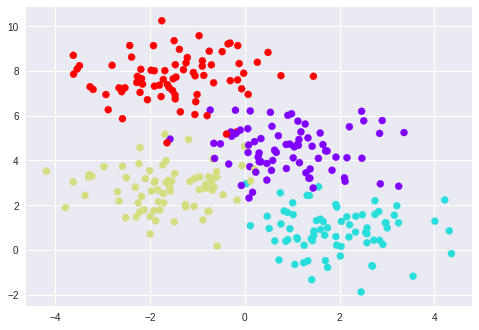

<Figure size 576x396 with 0 Axes>

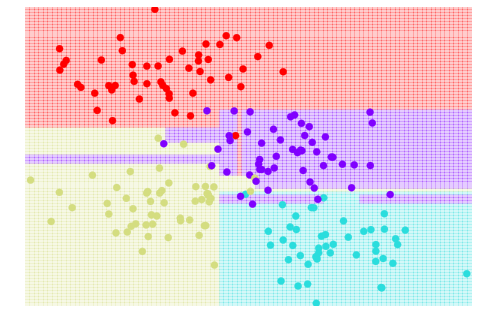

<Figure size 576x396 with 0 Axes>

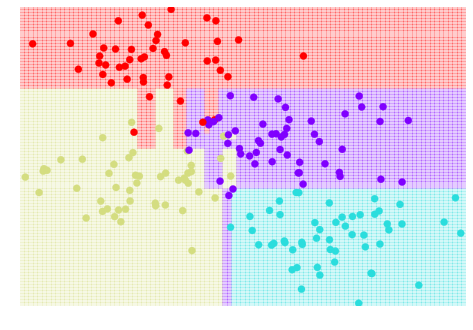

In [60]:
# First make simple dummy dataset
from sklearn.datasets import make_blobs
from fig_code import visualize_tree, plot_tree_interactive

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

plt.figure()
visualize_tree(clf, X[:200], y[:200], boundaries=False)
plt.figure()
visualize_tree(clf, X[-200:], y[-200:], boundaries=False)

The details of the classifications are completely different! That is an indication of **over-fitting**: when you predict the value for a new point, the result is more reflective of the noise in the model rather than the signal.

## Ensembles of Estimators: Random Forests

One possible way to address over-fitting is to use an **Ensemble Method**: this is a meta-estimator which essentially averages the results of many individual estimators which over-fit the data. Somewhat surprisingly, the resulting estimates are much more robust and accurate than the individual estimates which make them up!

One of the most common ensemble methods is the **Random Forest**, in which the ensemble is made up of many decision trees which are in some way perturbed.

There are volumes of theory and precedent about how to randomize these trees, but as an example, let's imagine an ensemble of estimators fit on subsets of the data. We can get an idea of what these might look like in scikit-learn as follows:

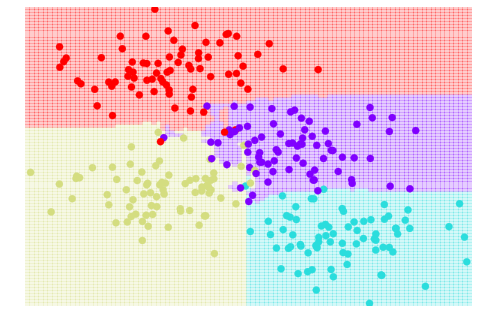

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_tree(clf, X, y, boundaries=False)

By averaging over 100 randomly perturbed models, we end up with an overall model which is a much better fit to our data!

*(Note: above we randomized the model through sub-sampling. Random Forests use more sophisticated means of randomization, which you can read about in, e.g. the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)*)


Now let's take a look how the above method performs on our dataset of the Portugese banking institution:

In [88]:
rafoclf = RandomForestClassifier(n_estimators=150, random_state=0)
rafoclf.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [79]:
y_pred = rafoclf.predict(X_test)
print('Accuracy of the random forest classifier on test set: {:.2f}'.format(rafoclf.score(X_test, y_test)))

Accuracy of the random forest classifier on test set: 0.90


### Confusion Matrix


In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1073   41]
 [  78   44]]


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1114
           1       0.52      0.36      0.43       122

    accuracy                           0.90      1236
   macro avg       0.72      0.66      0.69      1236
weighted avg       0.89      0.90      0.90      1236



#### Interpretation

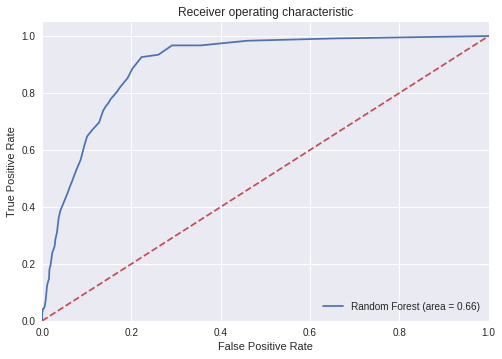

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rafoclf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rafoclf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_RandFor')
plt.show()

## Neural Networks: Multi-Layer Perceptron 

This class of models is named **Artificial Neural Network** as it
resembles, at an abstract level, the workings of a actual biological brain. ANNs are very popular in machine learning as they
provide a very general tool with which data scientist, and simple
machines, can make sense of very large and unstructured data
sets.

### How does this relate to logistic regression?

Let's recall the input vector ${\bf x}$ components weighed by the corresponding components in a weight vector ${\bf w}$. Then for a _2 - layer feed-forward neural network_ we can write:

$$
{\bf w} = \begin{bmatrix} w_0 & w_1 & ... & w_d \end{bmatrix}^T \\
 s = w_0 + w_1 x_1 + \;...\; +  \ w_d x_d = \sum_{i=0}^d w_i x_i\\
\Downarrow \\
s = w^1_0 + w^1_1\left(\sum_{i=0}^d w^2_i x_i\right) + \;...\; +  \ w^1_d \left(\sum_{i=0}^d w^2_i x_i\right) = \sum_{i=0}^d w^1_i \left(\sum_{i=0}^d w^2_i x_i \right) \\
$$

The concept in machine learning callled **layers** is the summation of the weights vector which in their turn take as input a summation of a "deeper" weights vector.




Based on nature, neural networks are the usual representation we make of the brain : neurons interconnected to other neurons which forms a network. In a pure biological brain, different neurons will fire signals only when receiving enough input signals from other neurons, which eventually will accumulate in something like “move the hand to pick up this pencil”.
The operation of a complete neural network is however more straightforward : one enters variables as inputs (for example an image if the neural network is supposed to tell what is on an image), and after some calculations, an output is returned (following the first example, giving an image of a cat should return the word “cat”).

![alt text](https://raw.githubusercontent.com/ledell/sldm4-h2o/master/mlp_network.png)

Now what happens "inside a neuron" mathematically is that the input signal $x$ gets multiplied by a weight $w$ and a bias gets added to that to form the output, which gets squished through an activation function $f$.

![alt text](https://miro.medium.com/max/651/1*UA30b0mJUPYoPvN8yJr2iQ.jpeg)




The above neural network, that consist of multiplications and additions in every "neuron" which in turn pas their output to every other "neuron" in the following layer, is called a **Multi - Layer Perceptron** (MLP).

Here is a nice video that you can hold as background information exlpaining in more depth the theory mentioned above: [Explanatory Video on Neural Networks](https://www.youtube.com/watch?v=aircAruvnKk&t=73s)



### How does this all look in scikit-learn?

To be able to **"train"** the neural network, which effectively means performing an iterative scheme where the predictions (outputs) are calculated from our inputs, the gradients with respect to the weights are calculated, and the weights are updated in their turn (in a _forward pass_ and a _backward pass_), we have to rescale our variables, in order for the gradients to be calculated numerically stable.

In scikit-learn there are several scalers, which you can experiment with, but we will use the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) which effectively normalizes the data:

$$x_{normalized}=\frac{(x-\text{mean}_x)}{\text{standard_deviation}_x}$$

Lastly be sure to [check out the parameters](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) of your MLP-classifier as different _hyper-parameter_ settings can drastically improve your classification score, training time, or regularization abilities (avoid overfitting).

In [72]:
# Move up 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [74]:
y_pred = mlp.predict(X_test)
print('Accuracy of the neural network classifier on test set: {:.2f}'.format(mlp.score(X_test, y_test)))

Accuracy of the neural network classifier on test set: 0.88


### Confusion Matrix

In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1022   92]
 [  57   65]]


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1114
           1       0.41      0.53      0.47       122

    accuracy                           0.88      1236
   macro avg       0.68      0.73      0.70      1236
weighted avg       0.89      0.88      0.89      1236



#### Interpretation

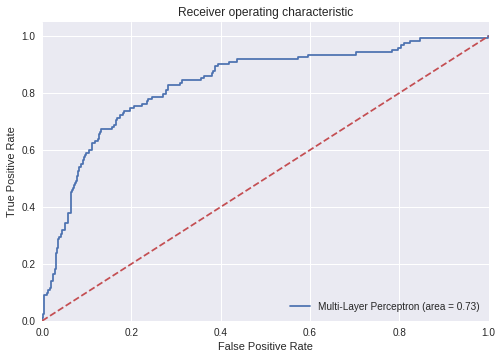

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, mlp.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Multi-Layer Perceptron (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_MLP')
plt.show()

> **Question:** Now that we re-scaled the training data, does it influence the classifier performances before the MLP as well? Can you alter the model parameters so that each of the classifiers attains at least an $f1$ score as in the original setting? Why do you think the parameter change has increased the performance of the model? 

## All these (hyper)parameters, can't someone just help me test the options?

Ofcourse it is important to be informed how the hyper-parameters of a model influence the regression or classification results of your model. However, often it is difficult to pin-point exactly from previous knowledge or experience, how a particular hyper-parameter setting is going to influence your model results from a particular dataset. Therefore, scikit-learn offers the option to automatically loop through the hyper-parameter settings of your classifier, and thereby reporting the different results, using a so-called **[Grid-search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)**. As an example, let us try to perform a Grid Search on our Multi-Layer Perceptron Classifier. 

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

# Set the parameters by cross-validation
tuned_parameters = {'solver': ['lbfgs','adam'],
                    'hidden_layer_sizes': np.arange(5, 20, 5 ), # [5,10,15]
                    'alpha': 10.0 ** -np.arange(1, 4),          # [0.1  , 0.01 , 0.001]
                    'learning_rate_init': 10.0 ** -np.arange(1, 4)  # [0.1  , 0.01 , 0.001]
                   }

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()



# Tuning hyper-parameters for precision



/home/jupyter/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A 

Best parameters set found on development set:

{'learning_rate_init': 0.01, 'solver': 'lbfgs', 'hidden_layer_sizes': 15, 'alpha': 0.1}

Grid scores on development set:

0.940 (+/-0.036) for {'learning_rate_init': 0.1, 'solver': 'lbfgs', 'hidden_layer_sizes': 5, 'alpha': 0.1}
0.917 (+/-0.032) for {'learning_rate_init': 0.1, 'solver': 'adam', 'hidden_layer_sizes': 5, 'alpha': 0.1}
0.943 (+/-0.036) for {'learning_rate_init': 0.01, 'solver': 'lbfgs', 'hidden_layer_sizes': 5, 'alpha': 0.1}
0.925 (+/-0.024) for {'learning_rate_init': 0.01, 'solver': 'adam', 'hidden_layer_sizes': 5, 'alpha': 0.1}
0.936 (+/-0.034) for {'learning_rate_init': 0.001, 'solver': 'lbfgs', 'hidden_layer_sizes': 5, 'alpha': 0.1}
0.930 (+/-0.025) for {'learning_rate_init': 0.001, 'solver': 'adam', 'hidden_layer_sizes': 5, 'alpha': 0.1}
0.953 (+/-0.027) for {'learning_rate_init': 0.1, 'solver': 'lbfgs', 'hidden_layer_sizes': 10, 'alpha': 0.1}
0.935 (+/-0.027) for {'learning_rate_init': 0.1, 'solver': 'adam', 'hidden_lay

/home/jupyter/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A 

Best parameters set found on development set:

{'learning_rate_init': 0.001, 'solver': 'lbfgs', 'hidden_layer_sizes': 15, 'alpha': 0.1}

Grid scores on development set:

0.915 (+/-0.102) for {'learning_rate_init': 0.1, 'solver': 'lbfgs', 'hidden_layer_sizes': 5, 'alpha': 0.1}
0.915 (+/-0.030) for {'learning_rate_init': 0.1, 'solver': 'adam', 'hidden_layer_sizes': 5, 'alpha': 0.1}
0.933 (+/-0.031) for {'learning_rate_init': 0.01, 'solver': 'lbfgs', 'hidden_layer_sizes': 5, 'alpha': 0.1}
0.930 (+/-0.019) for {'learning_rate_init': 0.01, 'solver': 'adam', 'hidden_layer_sizes': 5, 'alpha': 0.1}
0.934 (+/-0.028) for {'learning_rate_init': 0.001, 'solver': 'lbfgs', 'hidden_layer_sizes': 5, 'alpha': 0.1}
0.923 (+/-0.018) for {'learning_rate_init': 0.001, 'solver': 'adam', 'hidden_layer_sizes': 5, 'alpha': 0.1}
0.949 (+/-0.019) for {'learning_rate_init': 0.1, 'solver': 'lbfgs', 'hidden_layer_sizes': 10, 'alpha': 0.1}
0.938 (+/-0.027) for {'learning_rate_init': 0.1, 'solver': 'adam', 'hidden_la

---
# Thanks for your attention, to conclude here is a handy [scikit-learn cheat-sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf) which you can have a look at in your further research!